In [2]:
import pydicom 
import nibabel as nib
# Cargar un archivo nii
nii_path = './images/image.nii' 
nifti_img = nib.load(nii_path)
nifti_data = nifti_img.get_fdata()
print('Shape:', nifti_data.shape)

Shape: (512, 512, 161)


In [4]:
# Mostrar el header (metadatos) y propiedades del archivo NIfTI
print("Header (metadatos):")
print(nifti_img.header)

print("\nPropiedades principales:")
print(f"Dimensiones: {nifti_img.shape}")
print(f"Tipo de datos: {nifti_img.get_data_dtype()}")
print(f"Affine:\n{nifti_img.affine}")
print(f"Zooms (espaciado de voxel): {nifti_img.header.get_zooms()}")
print(f"Descripción: {nifti_img.header['descrip']}")

Header (metadatos):
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 512 512 161   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [1.    0.781 0.781 3.    0.    0.    0.    0.   ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : aligned
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 1.0
qoffset_x       : 199.6093
qoffset_y       : 199.6093
qoffset_z       : 1257.0

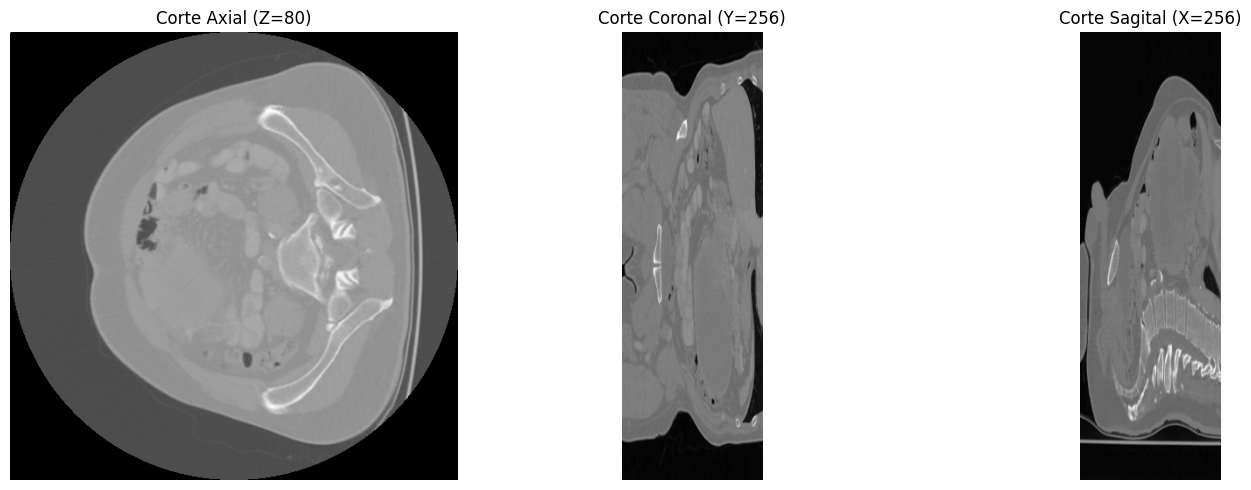

In [5]:
import matplotlib.pyplot as plt

# Visualizar cortes en los tres planos principales
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Corte axial (plano XY, eje Z)
axial_idx = nifti_data.shape[2] // 2
axes[0].imshow(nifti_data[:, :, axial_idx], cmap='gray')
axes[0].set_title(f'Corte Axial (Z={axial_idx})')
axes[0].axis('off')

# Corte coronal (plano XZ, eje Y)
coronal_idx = nifti_data.shape[1] // 2
axes[1].imshow(nifti_data[:, coronal_idx, :], cmap='gray')
axes[1].set_title(f'Corte Coronal (Y={coronal_idx})')
axes[1].axis('off')

# Corte sagital (plano YZ, eje X)
sagittal_idx = nifti_data.shape[0] // 2
axes[2].imshow(nifti_data[sagittal_idx, :, :], cmap='gray')
axes[2].set_title(f'Corte Sagital (X={sagittal_idx})')
axes[2].axis('off')

plt.tight_layout()
plt.show()